In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt


% matplotlib inline
% config InlineBackend.figure_format = 'retina'

In [2]:
filename = 'c1p8.pickle'
with open(filename, 'rb') as f:
    data = pickle.load(f)

In [3]:
stim = data['stim']
rho = data['rho']

In [4]:
def compute_sta(stim, rho, num_timesteps):
    sta = np.zeros((num_timesteps,))
    spike_times = rho[num_timesteps:].nonzero()[0] + num_timesteps
    num_spikes = spike_times.shape[0]
    print('Number of time steps is {}'.format(num_spikes))
    
    spike_sum = np.zeros((1, num_timesteps))
    i = 0
    for i, spike_time in enumerate(spike_times):
        one_stim = stim[spike_time - num_timesteps + 1:spike_time + 1]
        sta += one_stim     
        
    sta /= num_timesteps
    return sta  


In [5]:
sampling_rate = 500  # Hz
sampling_period = (1 / sampling_rate) * 1000  # ms

In [6]:
window_time = 300  # ms
num_timesteps = window_time / sampling_period

In [7]:
sta = compute_sta(stim, rho, num_timesteps=int(num_timesteps))

Number of time steps is 53583


In [8]:
time = (np.arange(-num_timesteps, 0) + 1) * sampling_period

Text(0.5,1,'Spike-Triggered Average')

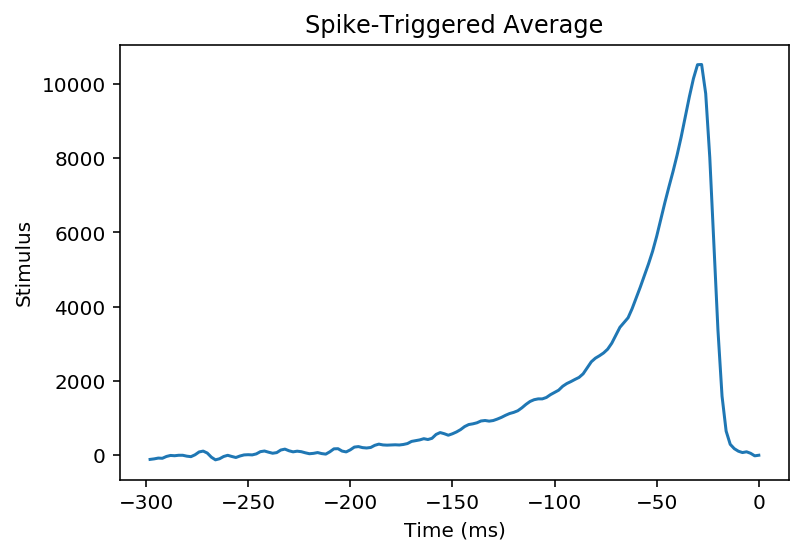

In [9]:
plt.plot(time, sta)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus')
plt.title('Spike-Triggered Average')

In [10]:
print('Sampling period is {}'.format(sampling_period))
print('Number of timesteps is {}'.format(num_timesteps))

Sampling period is 2.0
Number of timesteps is 150.0
